**Import Libraries:**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

**Load Data:**

In [52]:
# Load the datasets
edgap = pd.read_excel('../data/EdGap_data.xlsx', dtype={'NCESSCH School ID': object})
school_information = pd.read_csv('../data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape')

pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
pd.set_option('display.width', None)  # Disable line wrapping for better readability

/var/folders/n3/pcj4k0m94415fgwnccl63v5r0000gn/T/ipykernel_1724/3543914010.py:3: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv('../data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape')


**Interpretation:** Succesfully loaded the EdGap and School Information data into pandas DataFrames 

**Display head of data:**

In [53]:
# Display the first few rows of each dataset
print("EdGap data:")
print(edgap.head())

EdGap data:
  NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0       

**Interpretation:** The purpose of the above step is to inspect schema, confirm the data availability.

In [54]:
# Display the first few rows of each dataset
print("\nSchool information data:")
print(school_information.head())


School information data:
  SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  \
0  Alabama Youth Services               1    NaN   AL-210  100002   
1  Alabama Youth Services               1    NaN   AL-210  100002   
2  Alabama Youth Services               1    NaN   AL-210  100002   
3  Alabama Youth Services               1    NaN   AL-210  100002   
4  Alabama Youth Services               1    NaN   AL-210  100002   

      ST_SCHID       NCESSCH     SCHID           MSTREET1 MSTREET2 MSTREET3  \
0  AL-210-0020  1.000020e+10  100277.0       P 

**Interpretation:** The purpose of the above step is to inspect schema, confirm the data availability.

**`info` method to check data types, size of the dataframe and number of missing values:** 

In [55]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


**Interpretation:** From the above result it is understood thatb there are missing vakues in the DataFrame the following columns CT Unemployment, CT Pct Adults with College Degree, CT Pct Childr In Married Couple Family, CT Median Household Income

In [56]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

**Interpretation:** From the above result it is understood that there are missing values in the dataframe under columns like CHARTER_TEXT, LEVEL etc.,

**Pair Plot to explore relationship between variables:**

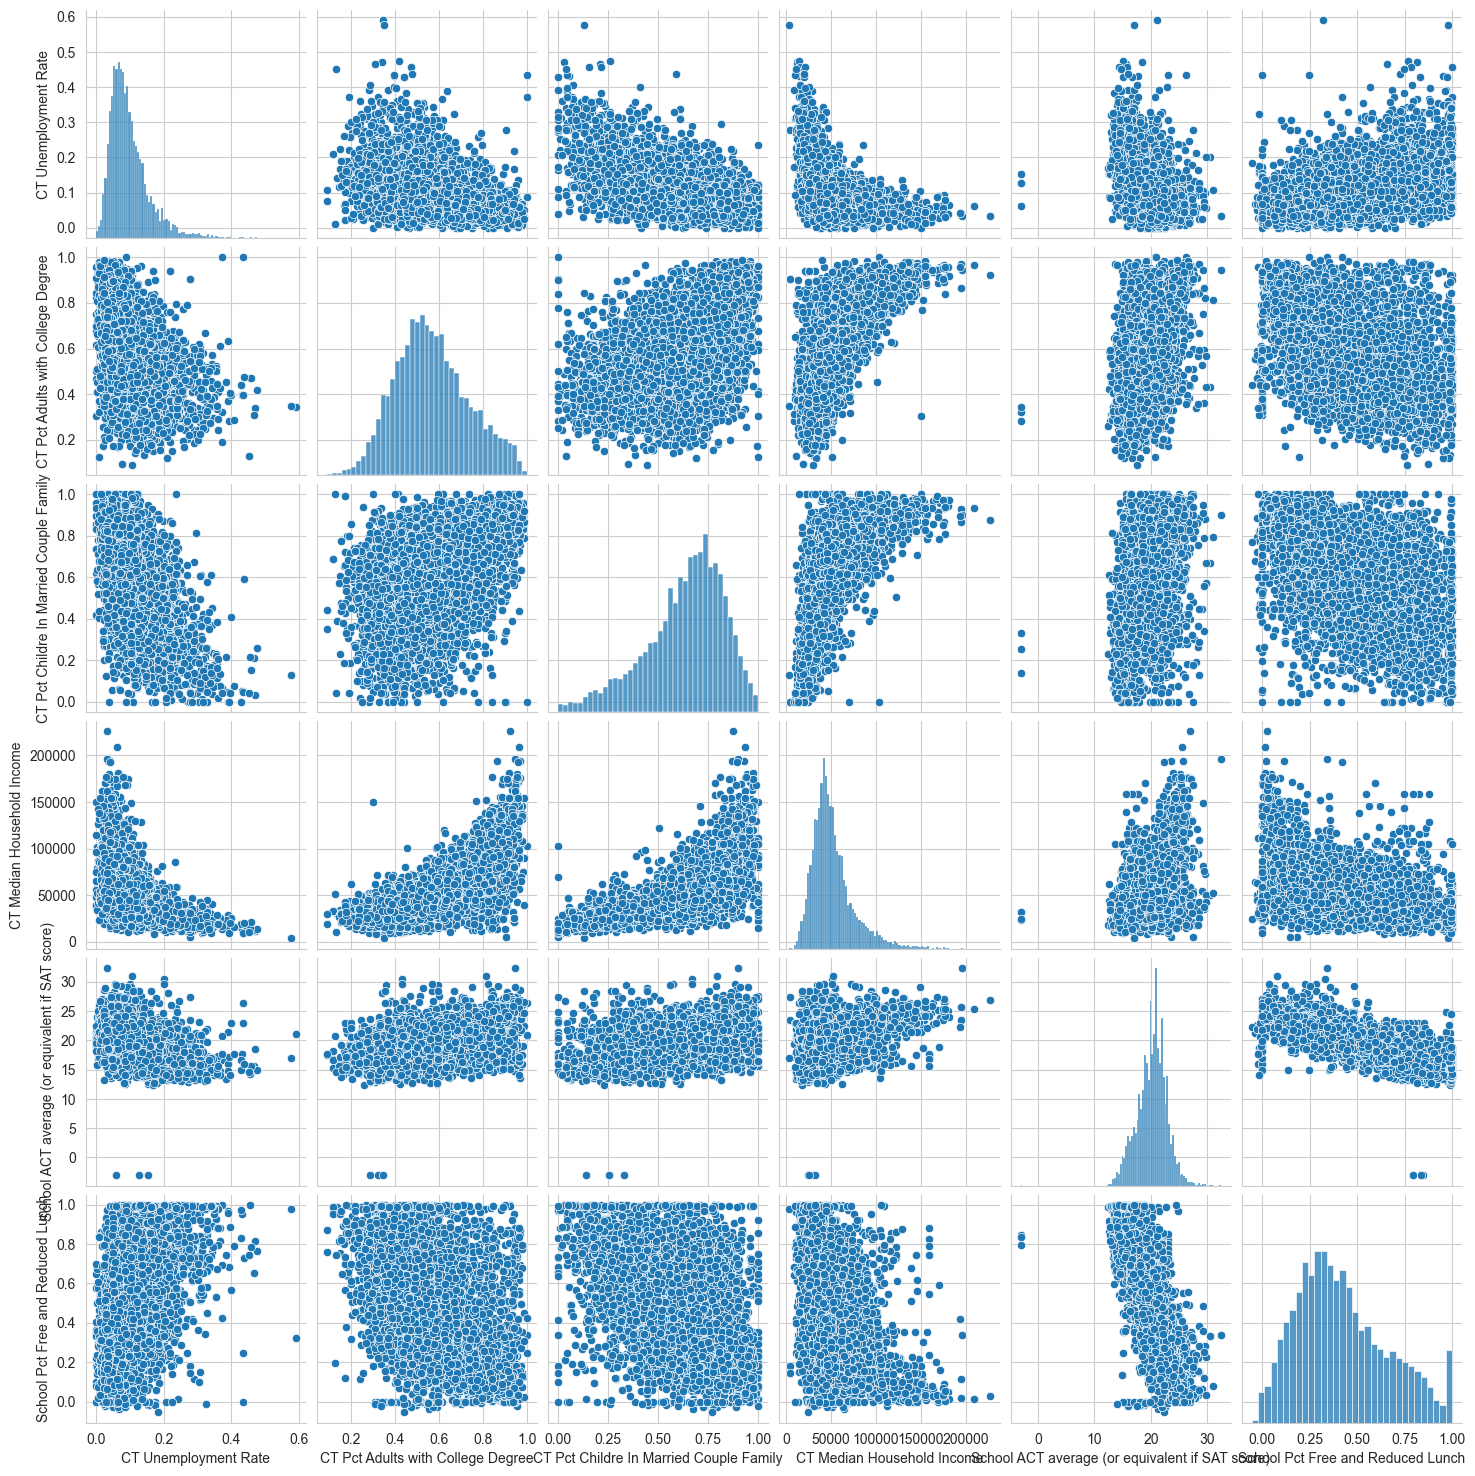

In [57]:
sns.pairplot(edgap.drop(columns='NCESSCH School ID'))
plt.show()

**Interpretation:** It plots all pairwise nmeric relationships in dataset. 

ACT average vs CT Unemployment Rate:
Unemployment rate increases ACT average decreases - negative correlation

ACT average vs CT Median Household Income:
House hold income increases ACT average increases  - positive correlation

ACT average vs CT Pct Adult College Degree:
CT Pct Adult College Degree increases ACT average increases - positive coreelation

ACT average vs CT Pct Children in Married Couple Family:
CT Pct Children in Married Couple Family increases slight increase in ACT average - mild positive correlation

ACT average vs Pct Free ans Reduced Lunch:
Pct Free ans Reduced Lunch increases ACT average decreases - negative correlation.

**Adding regression lines to Pair plot:**

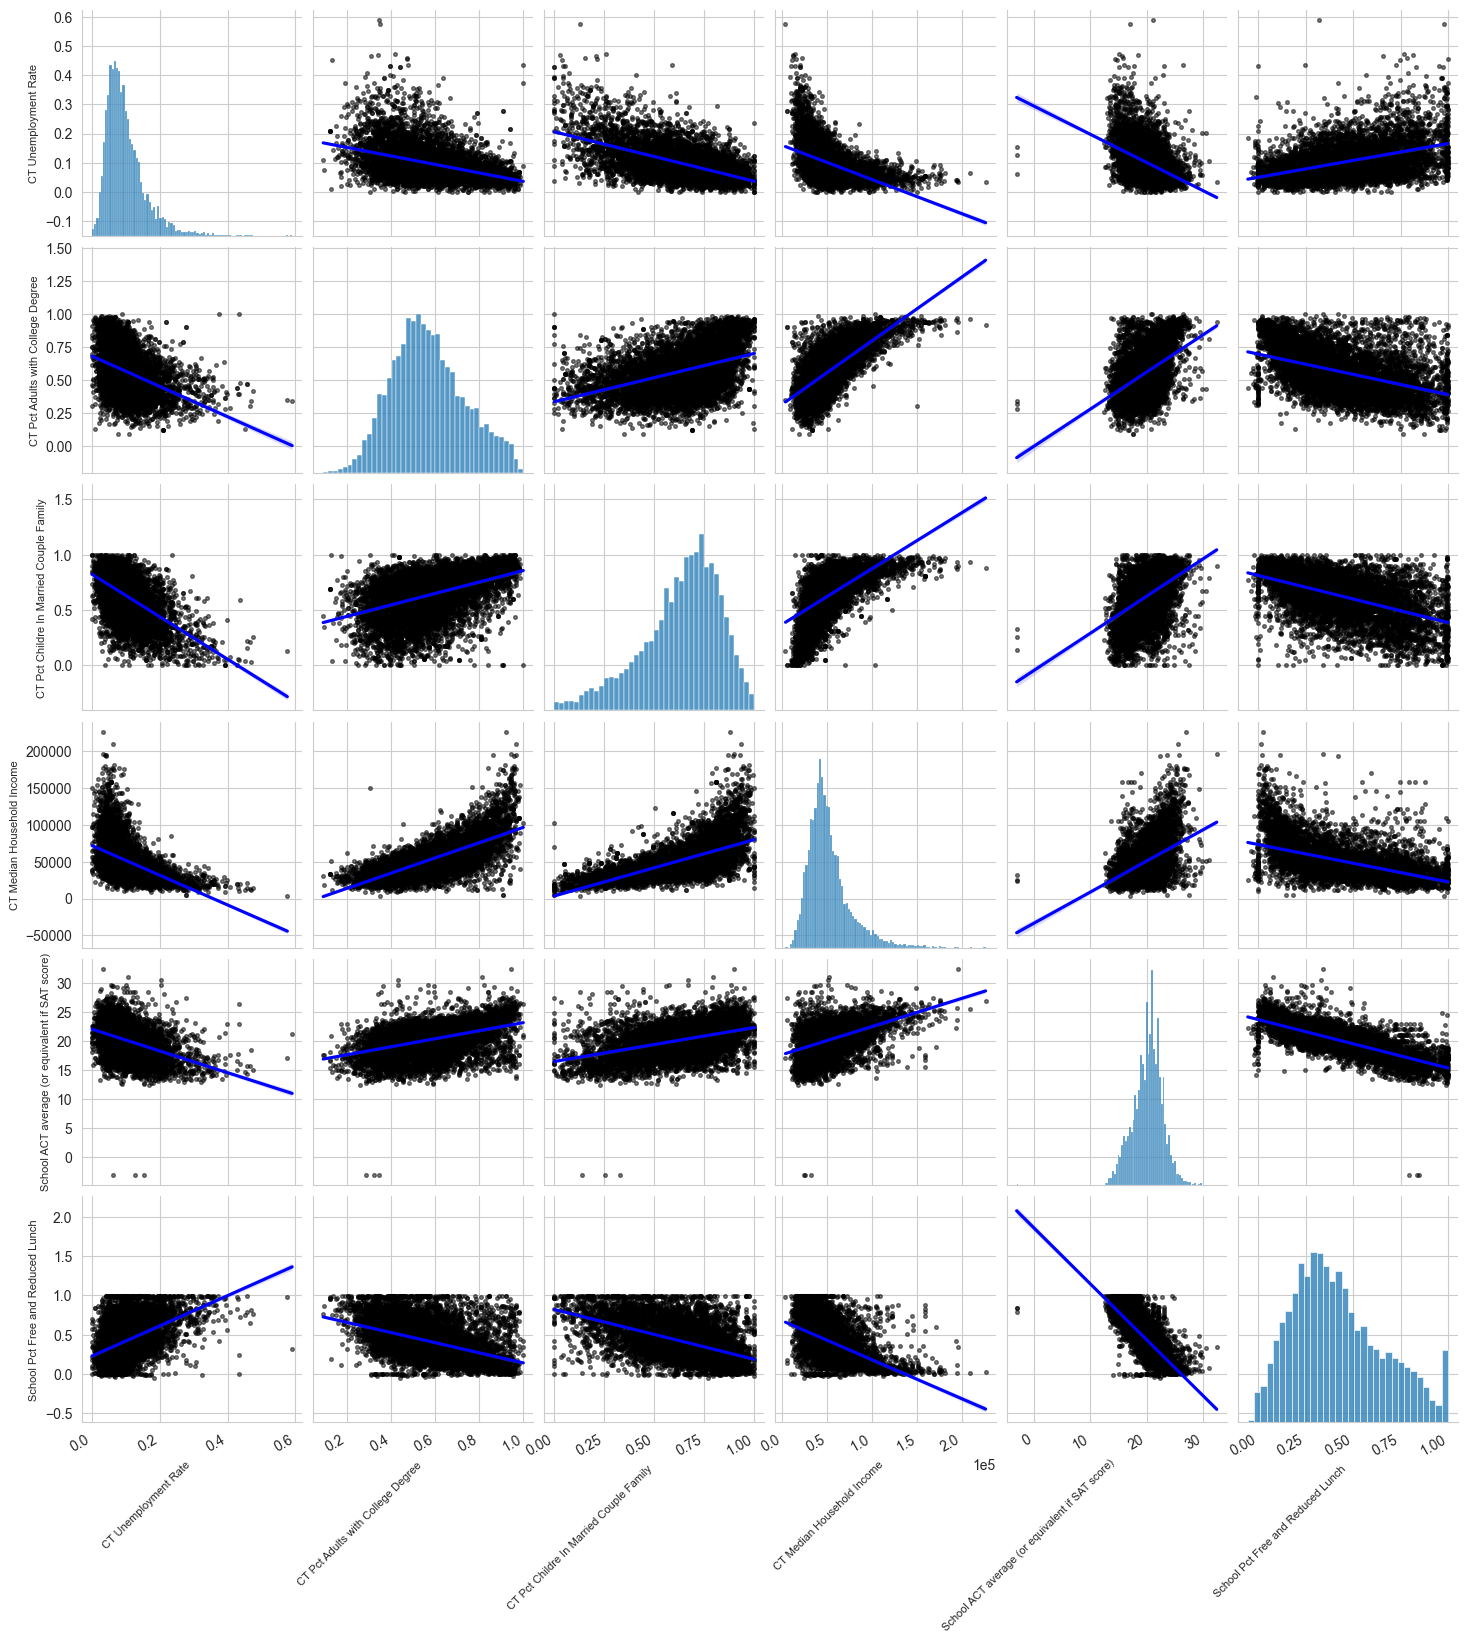

In [58]:
fig = sns.pairplot(edgap.drop(columns='NCESSCH School ID'), kind='reg', plot_kws={'line_kws':{'color':'blue'}, 'scatter_kws': {'alpha':0.5, 'color': 'k', 's': 7}})

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

**Ploting single row:**

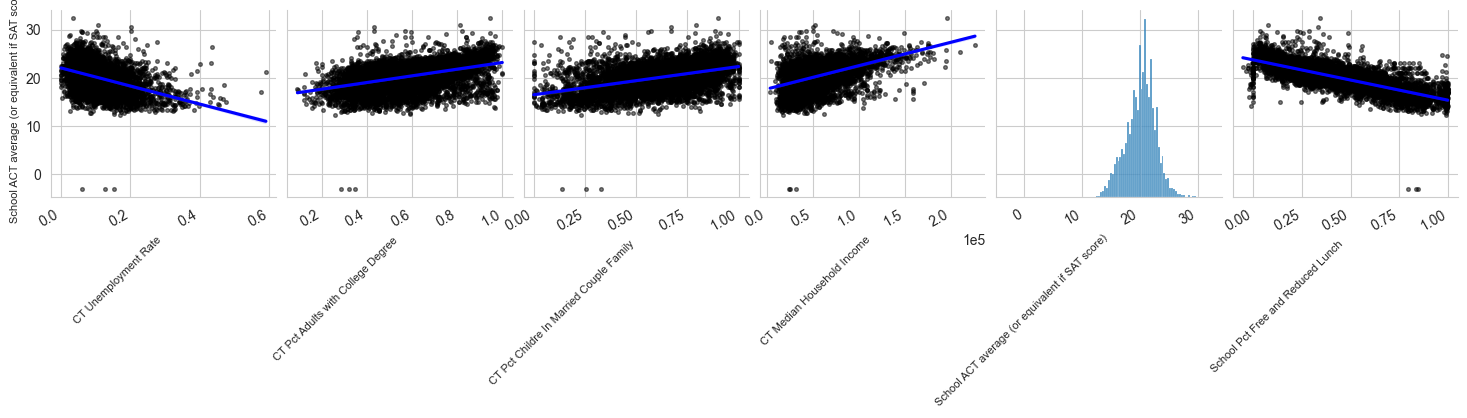

In [59]:
fig = sns.pairplot(edgap.drop(columns='NCESSCH School ID'), y_vars=['School ACT average (or equivalent if SAT score)'], kind='reg', plot_kws={'line_kws':{'color':'blue'}, 'scatter_kws': {'alpha':0.5, 'color': 'k', 's': 7}})

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

**Interpretation:** 

ACT average vs CT Unemployment Rate:
Unemployment rate increases ACT average decreases - negative correlation

ACT average vs CT Median Household Income:
House hold income increases ACT average increases  - positive correlation

ACT average vs CT Pct Adult College Degree:
CT Pct Adult College Degree increases ACT average increases - positive coreelation

ACT average vs CT Pct Children in Married Couple Family:
CT Pct Children in Married Couple Family increases slight increase in ACT average - mild positive correlation

ACT average vs Pct Free ans Reduced Lunch:
Pct Free ans Reduced Lunch increases ACT average decreases - negative correlation.

**Data Preparation:**

**Selecting relevant subsets of the data:**

In [60]:
school_information = school_information[['SCHOOL_YEAR', 'NCESSCH','LSTATE', 'LZIP','SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']]
school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


**Interpretation:** Since school information amny columns we are selecting only the required columns i.e 'SCHOOL_YEAR', 'NCESSCH','LSTATE', 'LZIP','SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT'  

**Renaming Columns:**

In [66]:
edgap = edgap.rename(columns={'NCESSCH School ID': 'id',
                              'CT Pct Adults with College Degree': 'percent_college',
                              'CT Unemployment Rate': 'rate_unemployment',
                              'CT Pct Childre In Married Couple Family': 'percent_married',
                              'CT Median Household Income': 'median_income',
                              'School ACT average (or equivalent if SAT score)': 'average_act',
                              'School Pct Free and Reduced Lunch': 'percent_lunch'})

school_information = school_information.rename(columns={'SCHOOL_YEAR': 'year',
                                                         'NCESSCH': 'id',
                                                         'LSTATE': 'state',
                                                         'LZIP': 'zip_code',
                                                         'SCH_TYPE_TEXT': 'school_type',
                                                         'LEVEL': 'school_level',
                                                         'CHARTER_TEXT': 'charter'})


In [67]:
edgap.head()


,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [68]:
school_information.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


**Join DataFrames:**

In [69]:
school_information['id'] = school_information['id'].astype(object)
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


**Interpretation:** As we nned to join the frames on identity of the school, since that column is of object type in EdGap data frame therefore we are type casting identity of school column in school_information dataframe to object since it is in float64 

In [70]:
df = edgap.merge(school_information, how='left', on='id')
df.head

<bound method NDFrame.head of                 id  rate_unemployment  percent_college  percent_married  \
0     100001600143           0.117962         0.445283         0.346495   
1     100008000024           0.063984         0.662765         0.767619   
2     100008000225           0.056460         0.701864         0.713090   
3     100017000029           0.044739         0.692062         0.641283   
4     100018000040           0.077014         0.640060         0.834402   
...            ...                ...              ...              ...   
7981  560530200294           0.034549         0.590780         0.720077   
7982  560569000311           0.069538         0.633860         0.808841   
7983  560569500360           0.035159         0.764566         0.776570   
7984  560576200324           0.063877         0.670532         0.879324   
7985  560583000335           0.033553         0.736511         0.821128   

      median_income  average_act  percent_lunch       year state zip_

**Interpretation:** The above statement left joins the  data frames EdGap and school_information.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


**Quality Control:**


**Checking the minimum and maximum values in each column:**

In [72]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


**Interpretation:** It provides the summary statistics for all numeric columns in the DataFrame. From the result average_act and percent_lunch min values are negative looks like invalid values.

In [73]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
min,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,0.59,1.00,1.0,226181.0,32.36,1.00


**Interpretation:** The above statment computes min and max values for numerical columns. From the result average_act and percent_lunch min values are negative looks like invalid values.

**Setting out of range values to NaN using np.nan:**

In [74]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

**Interpretation:** The above steps replaces negative values in precent_lunbch with NaN and average_act less the 1 with NaN

**Checking the types, level and charter status of school:**

In [75]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

**Interpretation:** The data set has more regular schools compared to alternative, special education, career and Technical schools.

In [76]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

**Interpretation:** It has more high schools compared to other other/Not reported/Elementary schools

In [77]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

**Keeping only the high schools:**

In [78]:
df = df.loc[df['school_level'] == 'High']

**Interpretation:** We are only taking high school records from the dataset.

**Duplicate check:**

In [79]:
df.duplicated().sum()

0

**Interpretation:** No duplicates in the dataset.

**Identify missing values:**

In [80]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


**Interpretation:** Some of the columns in the dataset has missing values like reate_unemployment, percent_lunch etc., which suggest that we need to do data handling for missing values.

In [81]:
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name='Percent Missing Values')

,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


**Interpretation:** The above step provides missing values count in percentage.

**Check for different states in the data:**

In [82]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

**Interpretation:** The above rersults states that our dataset have values only from certain states.

In [83]:
df['state'].nunique()

20

**Ploting map:**

In [85]:
import plotly.offline as po
import plotly.graph_objs as pg

layout = dict(geo = {"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools"))

data = dict(type="choropleth",
            locations=df['state'].value_counts().index,
            locationmode='USA-states',
            z=df['state'].value_counts().values,
            coloraxis='coloraxis')

x= pg.Figure(data=[data], layout=layout)
po.iplot(x)

**Drop rows where average ACT score is missing:**

In [86]:
df = df.dropna(subset=['average_act'])

**Interpretation:** Since our main focus of analysis is on average act therefore we dont consider data that dont have average act values. we are only interested in data that has average_act values. 

In [87]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


**Data imputation:**

In [88]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter']

**Interpretation:** In the above statement predictor variables are defined

In [89]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [90]:
imputer = IterativeImputer()

In [91]:
numerical_predictors = df[predictor_variables].select_dtypes(include=['number']).columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


**Interpretation:** In the above statement we are defining the columns to use in the imputation process

In [92]:
imputer.fit(df.loc[:,numerical_predictors])

,estimator,None
,missing_values,nan
,sample_posterior,False
,max_iter,10
,tol,0.001
,n_nearest_features,None
,initial_strategy,'mean'
,fill_value,None
,imputation_order,'ascending'
,skip_complete,False
,min_value,-inf


**Interpretation:** The above statement fits the imputer using numerical predictor variables

In [93]:
df.loc[:,numerical_predictors] = imputer.transform(df.loc[:,numerical_predictors])

**Interpretation:** The above statement impute the missing values in the training data

**Checking the missing values:**

In [94]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


**Saving the cleaned dataset in csv format inside the data folder:**

In [95]:
df.to_csv('../data/cleaned_education_data.csv', encoding='utf-8-sig', index=False)

In [96]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


In [97]:
# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.anova import anova_lm

**Heat Map:**

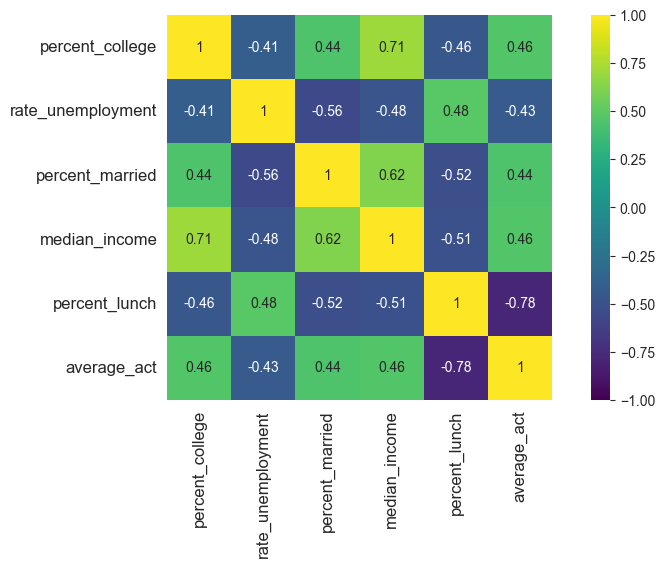

In [99]:
predictors = ['percent_college', 'rate_unemployment', 'percent_married', 'median_income', 'percent_lunch']
numerical_predictors = df[predictors].select_dtypes(include=['number']).columns.to_list()
corr_matrix = df[numerical_predictors+["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(corr_matrix, vmax=1,vmin=-1, square=True, annot=True, cmap="viridis")
plt.tick_params(labelsize=12)
plt.show()

**Interpretation:** The heatmap displays the correlation between average_act and other variables.

Positive correaltions with Average ACT:
median income, percent college, percent married.
Negative Correlation with Average ACT:
rate_unemployment, percent_lunch
 

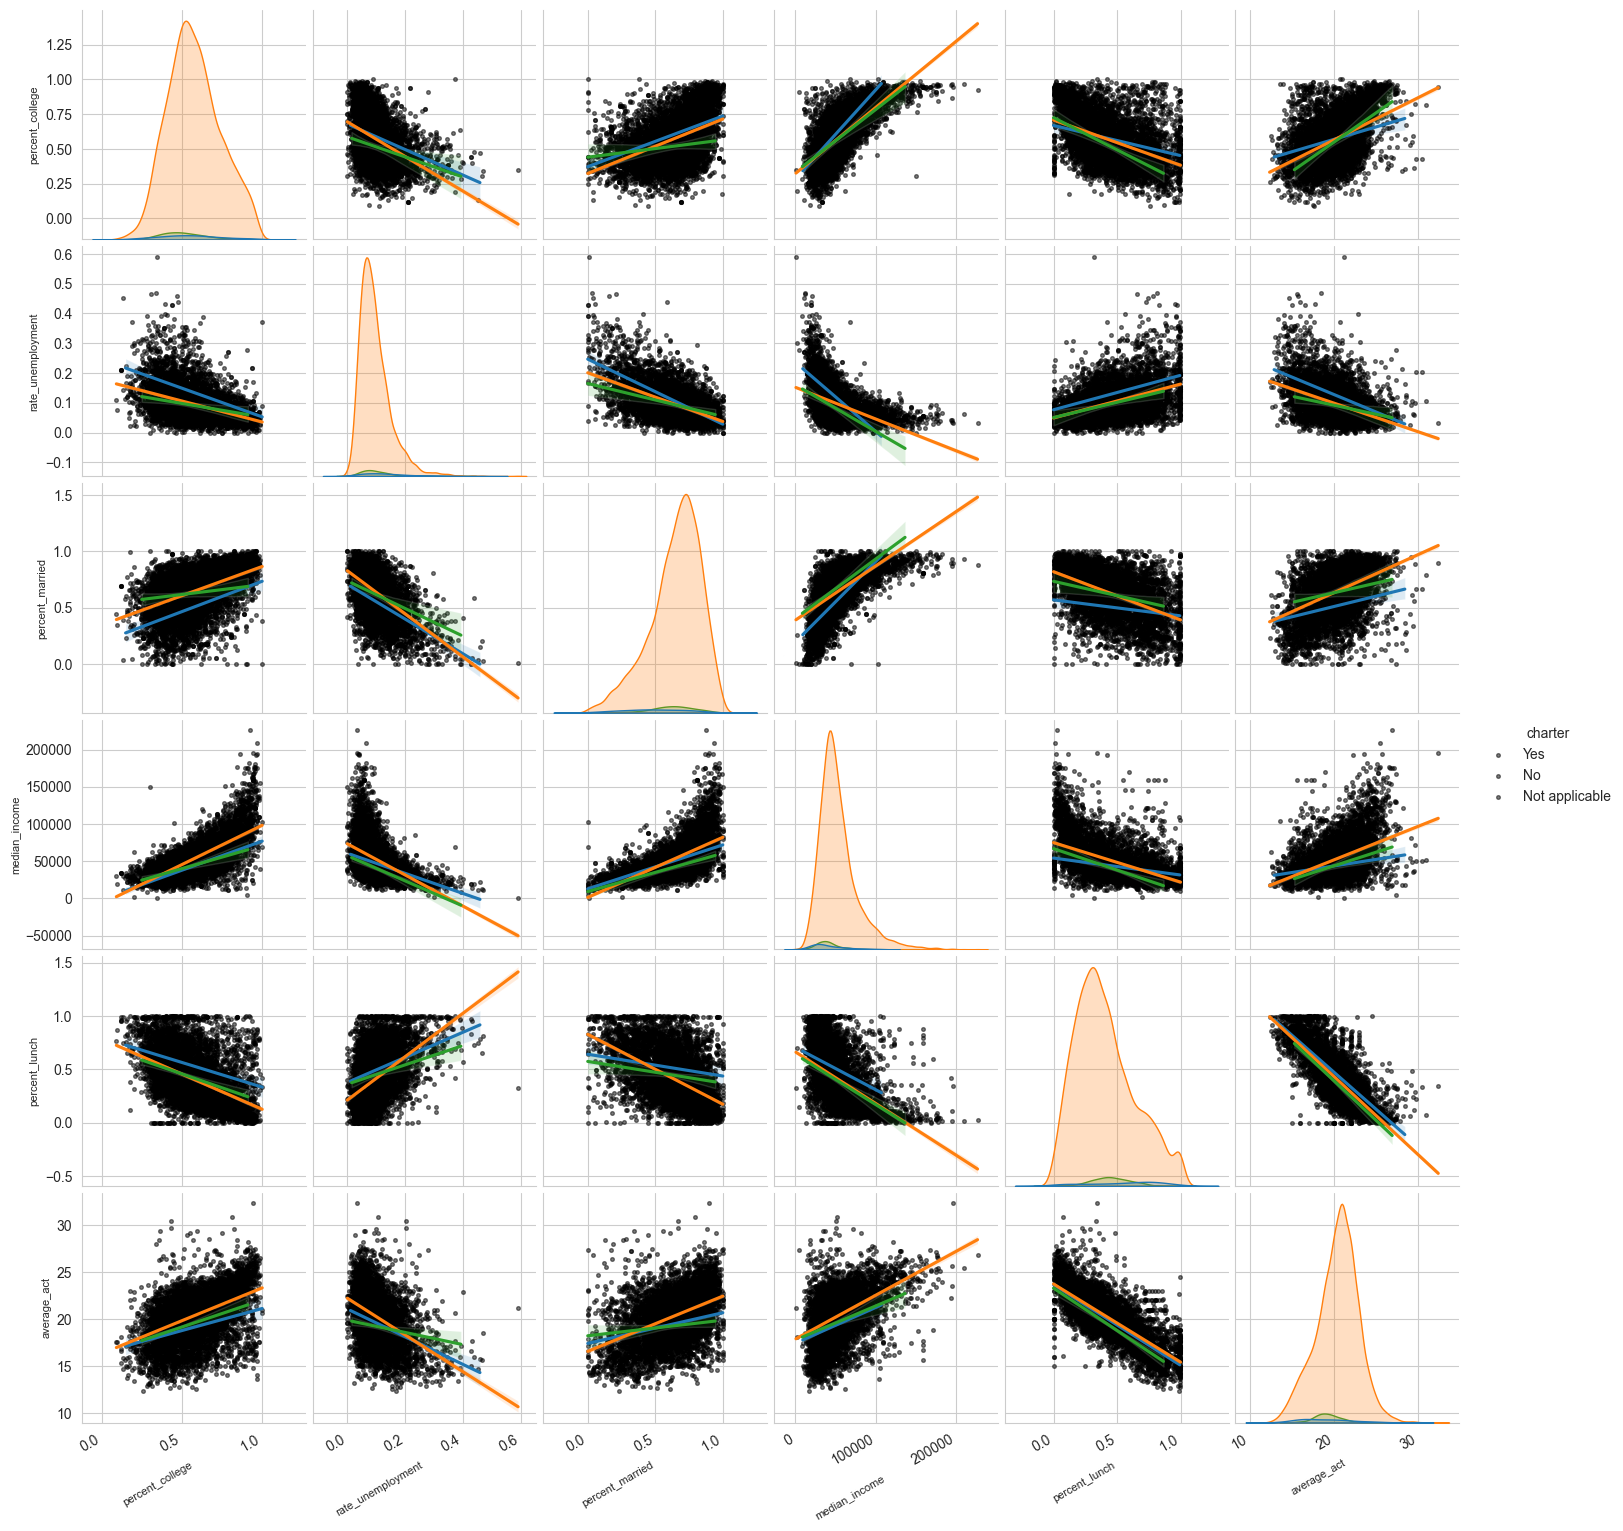

In [100]:
fig = sns.pairplot(data=df, vars=numerical_predictors + ['average_act'], hue='charter', kind='reg', plot_kws={"scatter_kws":{"alpha":0.5, "color":"k", "s":7}})

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

**Interpretation:** Pairplot plots the relationship between numerical predictors and target variable average_act.

Positive correaltions with average_act:
median_income, percent_college, percent_married.
Negative Correlation with average_act:
rate_unemployment, percent_lunch

It looks like relationship doesnt show any significant change between charter and non charter schools.

**BoxPlots:**

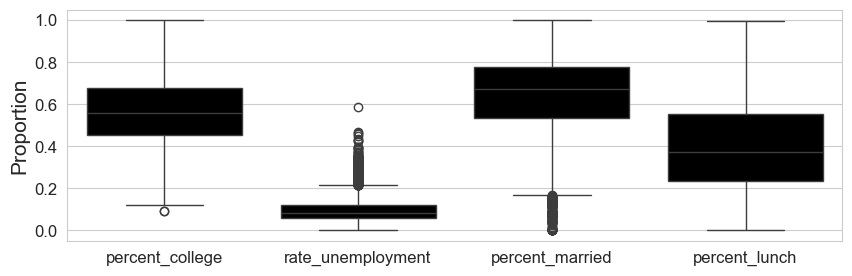

In [102]:
plt.figure(figsize=(10, 3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

**Interpretation:** 
percent_college: 40% - 70%, high college education with no outliers
rate_unemployment:  low unemploynment_rate with outliers and the outliers are not far away from the data.
percent_married: 60%-80%, high marraiage rate with outliers and the outliers are not far away from the data.
 

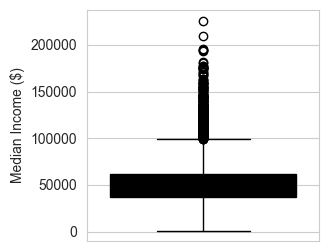

In [104]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=df, y ='median_income', color='k')
plt.ylabel('Median Income ($)')
plt.show()

**Interpretation:** The median house hold income is around $70K and there are outliers which is predictable with some higher income people. 